In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmedffarahat","key":"6aae4c6fe4972bda3351ee61c546bab4"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kritanjalijain/amazon-reviews

Dataset URL: https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews
License(s): CC0-1.0
100% 1.29G/1.29G [00:44<00:00, 40.1MB/s]
100% 1.29G/1.29G [00:44<00:00, 30.9MB/s]


In [ ]:
! mkdir train

In [ ]:
! unzip /content/amazon-reviews.zip -d train

Archive:  /content/amazon-reviews.zip
  inflating: train/amazon_review_polarity_csv.tgz  
  inflating: train/test.csv          
  inflating: train/train.csv         


In [ ]:
import re
import unicodedata
import itertools
from datasets import Dataset

import pandas as pd
import numpy as np
import pandas
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import HashingVectorizer
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.svm import SVC
import seaborn as sns
from nltk.corpus import stopwords
from nltk import word_tokenize
porter_stemmer = PorterStemmer()
import string
stop_words = list(stopwords.words('english'))
import unicodedata as ud
from nltk.stem.isri import ISRIStemmer
stemmer = ISRIStemmer()
from nltk.tokenize.treebank import TreebankWordDetokenizer
import unicodedata as ud
other_punctuation='⇣ ⇣ ⇣˝ ° • • … ⌒⌒ ღ'
import tensorflow as tf
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout,Embedding,SimpleRNN,LSTM
from tensorflow import keras
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
pip install datasets

In [ ]:
train = pd.read_csv("/content/train/train.csv")
test = pd.read_csv("/content/train/test.csv")

In [ ]:
train.columns = ["polarity","title", "text"]
train = train.sample(100000,random_state = 99)
train.head()

,polarity,title,text
2136295,2,Making a suit of human skin is hard work. Real...,"Yes, go ahead and laugh. But some of the other..."
2620775,2,If Only Amazon allowed my 6 *s.,"Wow,This movie is a classic. Family movie by a..."
1588872,1,I THOUGHT APPLE WAS USER FRIENDLY,I THOUGHT APPLE WAS USER FRIENDLY???????? I GU...
3125694,2,Very Helpful,I bought this book after joining Curves. It he...
1668956,1,Academically Repugnant,The first ten minutes of the film passed with ...


In [ ]:
test.columns = ["polarity","title", "text"]
test = test.sample(50000,random_state = 99)
test.head()

,polarity,title,text
110227,1,A Useless Tool for Novel Writing,I met the author of this book/software at a wr...
118016,1,A load of historical BS,I bought this book several years ago and it wa...
180926,1,Don't do it,I have had two of these units and both worked ...
121412,1,"Cute, but...",Really liked the Mobiblue 1500 cube at first -...
128565,1,Totally disappointed,This trilogy was recommended to me and I was s...


In [ ]:
train.isnull().sum()

,0
polarity,0
title,4
text,0


In [ ]:
train['title'].fillna("No Title", inplace = True)

In [ ]:
test.isnull().sum()

,0
polarity,0
title,4
text,0


In [ ]:
test['title'].fillna("No Title", inplace = True)

<Axes: xlabel='polarity', ylabel='count'>

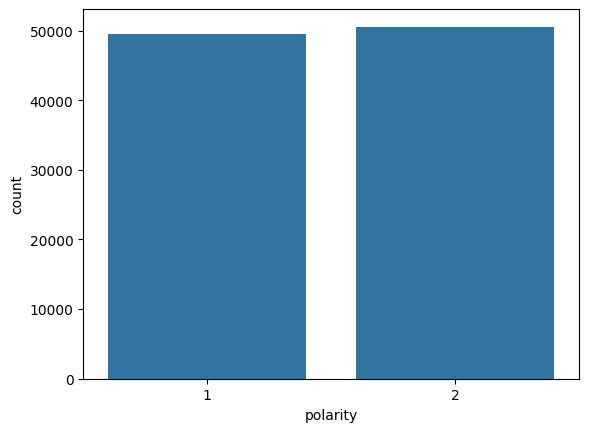

In [ ]:
sns.countplot(x ='polarity', data = train)

<Axes: xlabel='polarity', ylabel='count'>

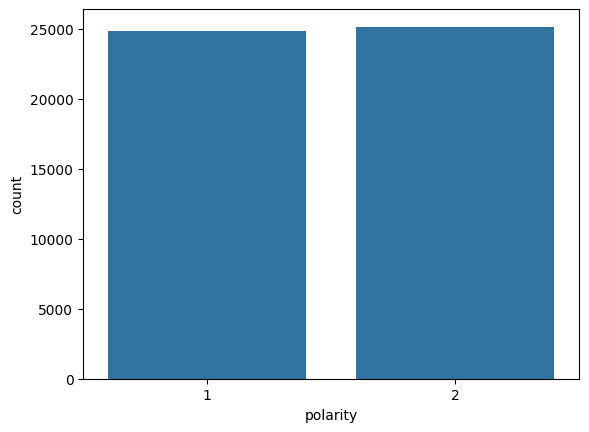

In [ ]:
sns.countplot(x ='polarity', data = test)

In [ ]:
pr=PorterStemmer()
def clean(text):
    text=text.lower()
    without_punctuation ="".join(i for i in text if i not in string.punctuation)
    Without_punctuation= ''.join(c for c in without_punctuation if not ud.category(c).startswith('P'))
    nums = re.compile(r'\d+')
    clean_text = nums.sub(r'', Without_punctuation)
    clean_text =  ' '.join([word for word in  clean_text.split() if word not in stop_words])
    emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"
                                   u"\U0001F300-\U0001F5FF"
                                   u"\U0001F680-\U0001F6FF"
                                   u"\U0001F1E0-\U0001F1FF"
                                   u"\U00002500-\U00002BEF"
                                   u"\U00002702-\U000027B0"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   u"\U0001f926-\U0001f937"
                                   u"\U00010000-\U0010ffff"
                                   u"\u2640-\u2642"
                                   u"\u2600-\u2B55"
                                   u"\u200d"
                                   u"\u23cf"
                                   u"\u23e9"
                                   u"\u231a"
                                   u"\ufe0f"
                                   u"\u3030"
                                   "]+", flags=re.UNICODE)
    clean = emoji_pattern.sub(r'', clean_text)
    words = word_tokenize(clean)
    stemmed_words=[pr.stem(word) for word in words]
    return TreebankWordDetokenizer().detokenize(stemmed_words)

In [ ]:
train['title']=train['title'].apply(clean)
train['text']=train['text'].apply(clean)

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
train['polarity'] = train['polarity'].apply(lambda x: 0 if x == 1 else 1)
test['polarity'] = test['polarity'].apply(lambda x: 0 if x == 1 else 1)

In [ ]:
train.head()

,polarity,title,text
2136295,1,make suit human skin hard work realli perfect ...,ye go ahead laugh other bought book know truth...
2620775,1,amazon allow,wowthi movi classic famili movi meansther some...
1588872,0,thought appl user friendli,thought appl user friendli guess wrong actual ...
3125694,1,help,bought book join curv help understand curv con...
1668956,0,academ repugn,first ten minut film pass slight sens bia minu...


In [ ]:
new_test=test.copy()
new_test=new_test.drop('polarity',axis=1)
for col in new_test.columns:
    test[col] = test[col].apply(clean)

In [ ]:
test.head()

,polarity,title,text
110227,0,useless tool novel write,met author booksoftwar writer confer gave lot ...
118016,0,load histor bs,bought book sever year ago worst ever spent no...
180926,0,dont,two unit work poorli tne start neither unit wo...
121412,0,cute,realli like mobiblu cube first great sound eas...
128565,0,total disappoint,trilog recommend disturb read page found viole...


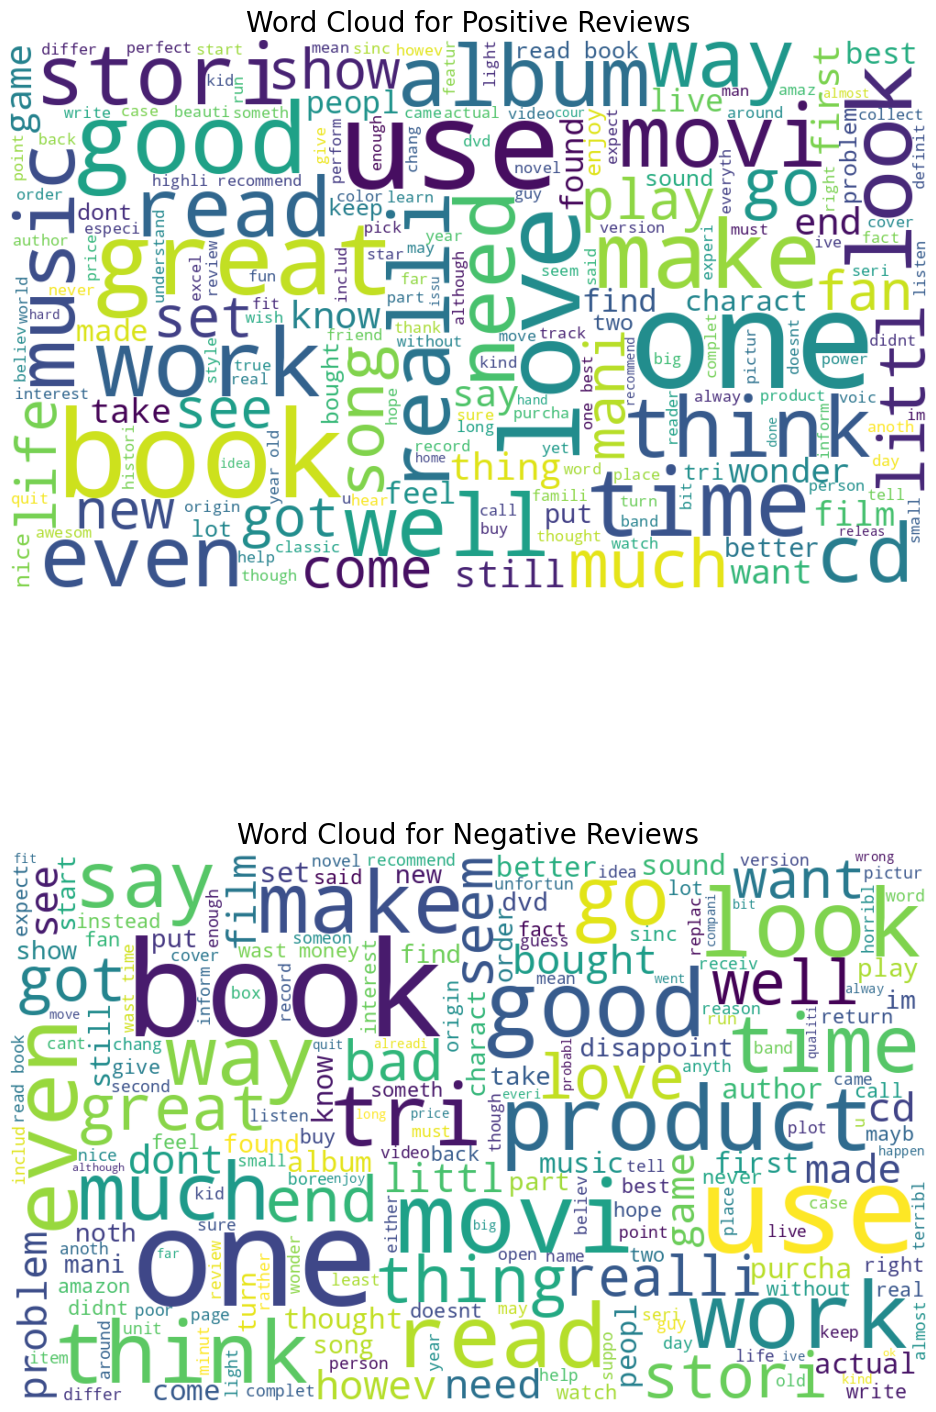

In [ ]:
from wordcloud import WordCloud
positive_reviews = " ".join(train[train['polarity'] == 1]['text'].tolist())
negative_reviews = " ".join(train[train['polarity'] == 0]['text'].tolist())

wordcloud_positive = WordCloud(width=1000, height=600, background_color='white', max_font_size=150).generate(positive_reviews)
wordcloud_negative = WordCloud(width=1000, height=600, background_color='white', max_font_size=150).generate(negative_reviews)

plt.figure(figsize=(10, 18))

plt.subplot(2, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews', fontsize=20)
plt.axis('off')


plt.subplot(2, 1, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews', fontsize=20)
plt.axis('off')

plt.tight_layout(pad=3)
plt.show()


In [ ]:
x_train = train["text"]
y_train = train["polarity"]
x_test = test["text"]
y_test = test["polarity"]

In [ ]:
vectorizer = TfidfVectorizer().fit(x_train)
x_train_tfidf = vectorizer.transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

In [ ]:
model = LogisticRegression()
model.fit(x_train_tfidf,y_train)
y_train_predict = model.predict(x_train_tfidf)
y_test_predict = model.predict(x_test_tfidf)

In [ ]:
train_mse = mean_squared_error(y_train, y_train_predict)
train_r2 = r2_score(y_train, y_train_predict)
train_accurcy=accuracy_score(y_train, y_train_predict)

test_mse = mean_squared_error(y_test, y_test_predict)
test_r2 = r2_score(y_test, y_test_predict)
test_accurcy=accuracy_score(y_test, y_test_predict)

print(f"Training MSE: {train_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"training accurcy: {train_accurcy}")
print(f"Testing MSE: {test_mse}")
print(f"Testing R2 Score: {test_r2}")
print(f"testing accurcy: {test_accurcy}")

Training MSE: 0.11279
Training R2 Score: 0.5487854030337671
training accurcy: 0.88721
Testing MSE: 0.1486
Testing R2 Score: 0.4055805515467178
testing accurcy: 0.8514


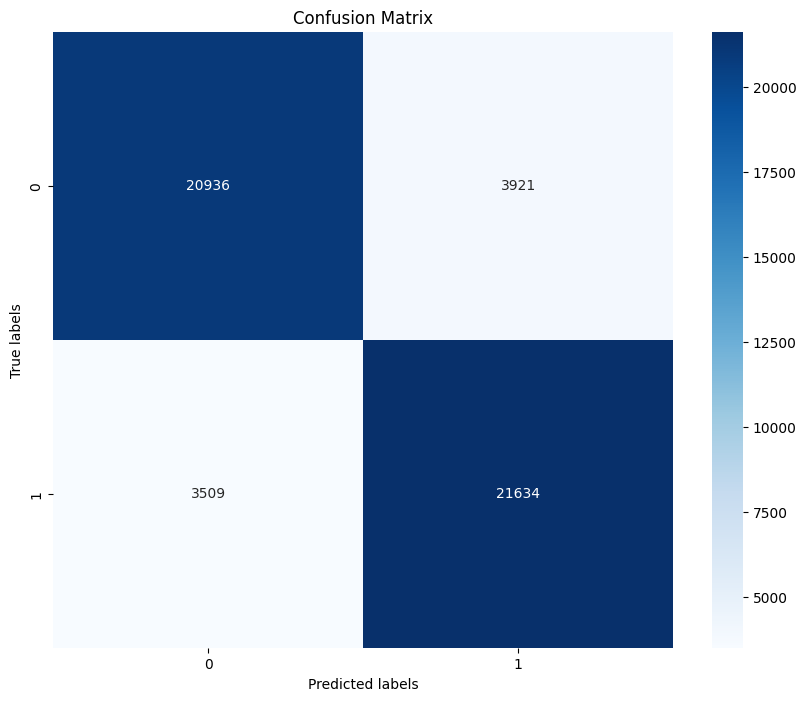

In [ ]:
conf_matrix = confusion_matrix(y_test,np.array(y_test_predict))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model = SVC(kernel='linear')
model.fit(x_train_tfidf,y_train)
y_train_predictsv = model.predict(x_train_tfidf)
y_test_predictsv = model.predict(x_test_tfidf)

In [ ]:
train_mse = mean_squared_error(y_train, y_train_predictsv)
train_r2 = r2_score(y_train, y_train_predictsv)
train_accurcy=accuracy_score(y_train, y_train_predictsv)

test_mse = mean_squared_error(y_test, y_test_predictsv)
test_r2 = r2_score(y_test, y_test_predictsv)
test_accurcy=accuracy_score(y_test, y_test_predictsv)

print(f"Training MSE: {train_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"training accurcy: {train_accurcy}")
print(f"Testing MSE: {test_mse}")
print(f"Testing R2 Score: {test_r2}")
print(f"testing accurcy: {test_accurcy}")

In [ ]:
conf_matrix = confusion_matrix(y_test,np.array(y_test_predictsv))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
X_train_ngrams = count_vectorizer.fit_transform(x_train)
X_test_ngrams = count_vectorizer.transform(x_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_ngrams, y_train)
y_train_predictlo = model.predict(X_train_ngrams)
y_test_predictlo = model.predict(X_test_ngrams)

In [ ]:
train_mse1 = mean_squared_error(y_train, y_train_predictlo)
train_r21 = r2_score(y_train, y_train_predictlo)
train_accurcy=accuracy_score(y_train, y_train_predictlo)

test_mse1 = mean_squared_error(y_test, y_test_predictlo)
test_r21 = r2_score(y_test, y_test_predictlo)
test_accurcy=accuracy_score(y_test, y_test_predictlo)

print(f"Training MSE: {train_mse1}")
print(f"Training R2 Score: {train_r21}")
print(f"training accurcy: {train_accurcy}")
print(f"Testing MSE: {test_mse1}")
print(f"Testing R2 Score: {test_r21}")
print(f"testing accurcy: {test_accurcy}")

In [ ]:
conf_matrix = confusion_matrix(y_test,np.array(y_test_predictsv))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_ngrams, y_train)
y_train_predictrf = model.predict(X_train_ngrams)
y_test_predictrf = model.predict(X_test_ngrams)

In [ ]:
train_mse = mean_squared_error(y_train, y_train_predictrf)
train_r2 = r2_score(y_train, y_train_predictrf)
train_accurcy=accuracy_score(y_train, y_train_predictrf)

test_mse = mean_squared_error(y_test, y_test_predictrf)
test_r2 = r2_score(y_test, y_test_predictrf)
test_accurcy=accuracy_score(y_test, y_test_predictrf)

print(f"Training MSE: {train_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"training accurcy: {train_accurcy}")
print(f"Testing MSE: {test_mse}")
print(f"Testing R2 Score: {test_r2}")
print(f"testing accurcy: {test_accurcy}")

In [ ]:
conf_matrix = confusion_matrix(y_test,np.array(y_test_predictrf))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
max_words = 2000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train['text'])

X_train = tokenizer.texts_to_sequences(train['text'])
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = tokenizer.texts_to_sequences(test['text'])
X_test = pad_sequences(X_test, maxlen=max_len)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
Lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
optimizer = tf.keras.optimizers.Adam(learning_rate=.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, callbacks=[Lr_schedule])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 32ms/step - accuracy: 0.7200 - loss: 0.5132 - val_accuracy: 0.8283 - val_loss: 0.3780 - learning_rate: 1.0000e-04
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.8396 - loss: 0.3638 - val_accuracy: 0.8363 - val_loss: 0.3681 - learning_rate: 1.0000e-04
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.8440 - loss: 0.3530 - val_accuracy: 0.8441 - val_loss: 0.3597 - learning_rate: 1.0000e-04
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.8513 - loss: 0.3392 - val_accuracy: 0.8450 - val_loss: 0.3531 - learning_rate: 1.0000e-04
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.8557 - loss: 0.3298 - val_accuracy: 0.8378 - val_loss: 0.3619 - learning_rate: 1.0000e-04
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.8582 - loss: 0.3243 - val_accuracy: 0.8458 - val_loss: 0.3549 - learning_rate: 1.0000e-04
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 100, 128)       │       256,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ (None, 100, 128)       │        98,816 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ (None, 128)            │        98,816 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,395,429 (5.32 MB)

 Trainable params: 465,121 (1.77 MB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 930,244 (3.55 MB)

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
class_report = classification_report(y_test, y_pred)
print(class_report)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step
0.8461
[[21237  3620]
 [ 4075 21068]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85     24857
           1       0.85      0.84      0.85     25143

    accuracy                           0.85     50000
   macro avg       0.85      0.85      0.85     50000
weighted avg       0.85      0.85      0.85     50000



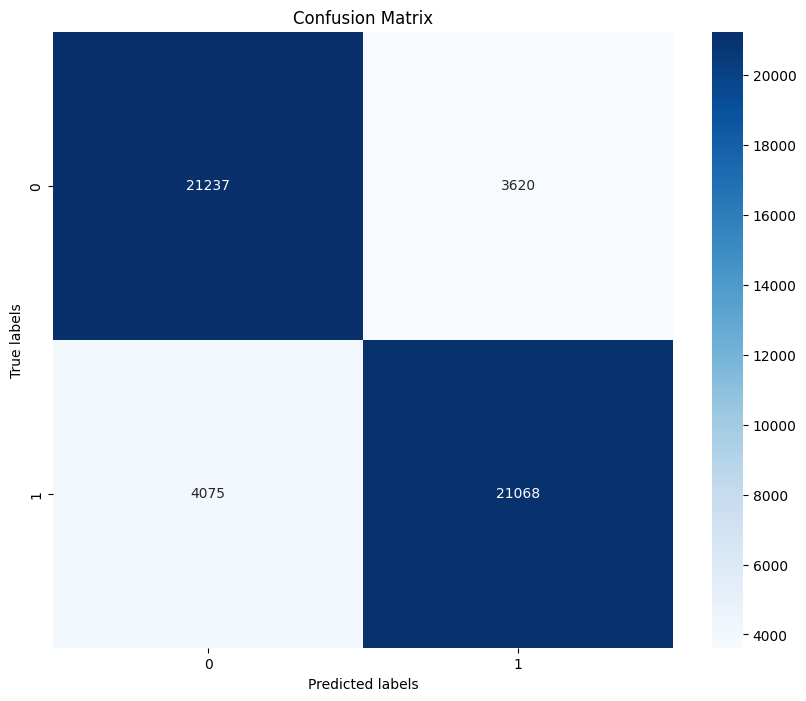

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

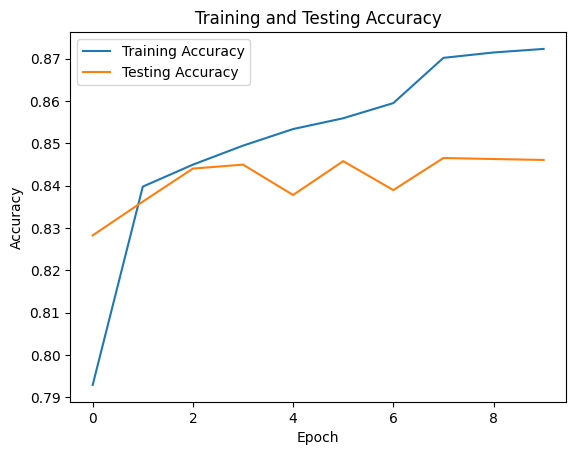

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

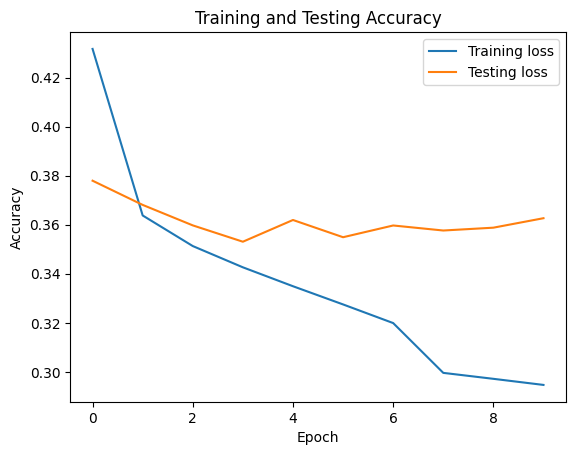

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Testing loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

In [ ]:
pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.6/565.6 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.4 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf

# Parameters
max_words = 2000
max_len = 100
latent_dim = 100

def build_generator():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(latent_dim,)),

        # Project and reshape the random noise
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(max_len * 128, activation='relu'),
        tf.keras.layers.Reshape((max_len, 128)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
        tf.keras.layers.Dense(max_words, activation='softmax')
    ])

    return model

def build_discriminator():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(max_len, max_words)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    return model

def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = tf.keras.Sequential([
        generator,
        discriminator
    ])

    return model

generator = build_generator()
discriminator = build_discriminator()

discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gan = build_gan(generator, discriminator)
gan.compile(optimizer='adam', loss='binary_crossentropy')

def train_gan(generator, discriminator, gan, X_train, epochs=10000, batch_size=32):
    half_batch = batch_size // 2

    for epoch in range(epochs):
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        real_sequences = X_train[idx]

        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_sequences = generator.predict(noise)

        real_labels = np.ones((half_batch, 1))
        fake_labels = np.zeros((half_batch, 1))

        d_loss_real = discriminator.train_on_batch(real_sequences, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_sequences, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_y = np.ones((batch_size, 1))  # Generator wants the discriminator to label the fakes as valid (1)

        g_loss = gan.train_on_batch(noise, valid_y)

        if epoch % 1000 == 0:
            print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}%] [G loss: {g_loss}]")

train_gan(generator, discriminator, gan, X_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_5_1/Cast:0", shape=(16, 100), dtype=float32). Expected shape (None, 100, 2000), but input has incompatible shape (16, 100)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(16, 100), dtype=int32)
  • training=True
  • mask=None

In [ ]:
import mlflow
import mlflow.keras
import mlflow.sklearn
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, r2_score
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Set MLflow tracking URI
mlflow.set_tracking_uri("https://dagshub.com/asamy4194/DEPI_Final_Project.mlflow")

# Set experiment
mlflow.set_experiment("Amazon-Reviews")

os.environ['MLFLOW_TRACKING_USERNAME'] = 'asamy4194'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '951cd23d2b7cec538703bd36d2e2fbef6a209ec8'
os.environ['MLFLOW_TRACKING_URI'] = 'https://dagshub.com/asamy4194/DEPI_Final_Project.mlflow'

# # Logistic Regression Model
# with mlflow.start_run(run_name="Logistic Regression with TF-IDF"):
#     model = LogisticRegression()
#     model.fit(x_train_tfidf, y_train)
#     y_train_predict = model.predict(x_train_tfidf)
#     y_test_predict = model.predict(x_test_tfidf)

#     train_acc = accuracy_score(y_train, y_train_predict)
#     test_acc = accuracy_score(y_test, y_test_predict)
#     train_mse = mean_squared_error(y_train, y_train_predict)
#     test_mse = mean_squared_error(y_test, y_test_predict)

#     mlflow.sklearn.log_model(model, "logistic_regression_tfidf")
#     mlflow.log_metric("train_accuracy", train_acc)
#     mlflow.log_metric("test_accuracy", test_acc)
#     mlflow.log_metric("train_mse", train_mse)
#     mlflow.log_metric("test_mse", test_mse)

# # SVM Model
# with mlflow.start_run(run_name="SVM with TF-IDF"):
#     model = SVC(kernel='linear')
#     model.fit(x_train_tfidf, y_train)
#     y_train_predict = model.predict(x_train_tfidf)
#     y_test_predict = model.predict(x_test_tfidf)

#     train_acc = accuracy_score(y_train, y_train_predict)
#     test_acc = accuracy_score(y_test, y_test_predict)

#     mlflow.sklearn.log_model(model, "svm_tfidf")
#     mlflow.log_metric("train_accuracy", train_acc)
#     mlflow.log_metric("test_accuracy", test_acc)

# Random Forest Model
with mlflow.start_run(run_name="Random Forest with CountVectorizer"):
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train_ngrams, y_train)
    y_train_predict = model.predict(X_train_ngrams)
    y_test_predict = model.predict(X_test_ngrams)

    train_acc = accuracy_score(y_train, y_train_predict)
    test_acc = accuracy_score(y_test, y_test_predict)

    mlflow.sklearn.log_model(model, "random_forest_ngrams")
    mlflow.log_metric("train_accuracy", train_acc)
    mlflow.log_metric("test_accuracy", test_acc)

# LSTM Model
with mlflow.start_run(run_name="LSTM with Tokenization"):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype("int32")
    test_acc = accuracy_score(y_test, y_pred)

    mlflow.keras.log_model(model, "lstm_tokenization")
    mlflow.log_metric("test_accuracy", test_acc)


2024/10/17 15:11:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/17 15:12:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest with CountVectorizer at: https://dagshub.com/asamy4194/DEPI_Final_Project.mlflow/#/experiments/3/runs/35e807cbdf2d4b42b0a834d2717d91f1.
2024/10/17 15:12:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/asamy4194/DEPI_Final_Project.mlflow/#/experiments/3.


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.7243 - loss: 0.5094 - val_accuracy: 0.8353 - val_loss: 0.3718
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 28ms/step - accuracy: 0.8421 - loss: 0.3634 - val_accuracy: 0.8404 - val_loss: 0.3610
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.8500 - loss: 0.3471 - val_accuracy: 0.8434 - val_loss: 0.3588
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.8528 - loss: 0.3357 - val_accuracy: 0.8447 - val_loss: 0.3557
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.8600 - loss: 0.3231 - val_accuracy: 0.8457 - val_loss: 0.3544
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 30ms/step - accuracy: 0.8613 - loss: 0.3173 - val_accuracy: 0.8456 - val_loss: 0.3544
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.8663 - loss: 0.3101 - val_accuracy: 0.8441 - val_loss: 0.3641
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.8704 -

2024/10/17 15:25:16 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/17 15:25:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/17 15:25:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run LSTM with Tokenization at: https://dagshub.com/asamy4194/DEPI_Final_Project.mlflow/#/experiments/3/runs/0c8e732d443b4a69abd99acc51e304bc.
2024/10/17 15:25:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/asamy4194/DEPI_Final_Project.mlflow/#/experiments/3.
